<a href="https://colab.research.google.com/github/soumilhooda/MLDLNNtoCV/blob/main/Q4_NNFL_Assignment1_SoumilHooda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import sklearn.metrics as skm


In [ ]:
def sigmoid(z):
  return 1.0/(1+np.exp(-z))

In [ ]:
def cost_function_LOR(X,y,w):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -(1/m)*(np.sum((y.T)*(np.log(hypothesis))+((1-y).T)*np.log(1-hypothesis)))
  return J

In [ ]:
def cost_function_LOR_L2(X,y,w,lamb):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -(1/m)*(np.sum((y.T)*(np.log(hypothesis))+((1-y).T)*np.log(1-hypothesis))) + (lamb/2)*(np.sum(np.square(w)))
  return J

In [ ]:
def cost_function_LOR_L1(X,y,w,lamb):
  hypothesis = sigmoid(np.dot(X,w.T))
  J = -(1/m)*(np.sum((y.T)*(np.log(hypothesis))+((1-y).T)*np.log(1-hypothesis)))+(lamb/2)*np.sum(np.abs(w))
  return J

In [ ]:
def batch_gradient_descent_LOR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w-(alpha/len(y))*np.dot((hypothesis-y).T,X)
    cost_history[i] = cost_function_LOR(X,y,w)
  return w, cost_history

In [ ]:
def batch_gradient_descent_LOR_L2(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w*(1-(alpha*lamb))-(alpha/len(y))*np.dot((hypothesis-y).T,X)
    cost_history[i] = cost_function_LOR_L2(X,y,w,lamb)
  return w, cost_history

In [ ]:
def batch_gradient_descent_LOR_L1(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    hypothesis = sigmoid(np.dot(X,w.T))
    w = w-(((alpha*lamb)/2)*np.sign(w))-(alpha/len(y))*np.dot((hypothesis-y).T,X)
    cost_history[i] = cost_function_LOR_L1(X,y,w,lamb)
  return w, cost_history

In [ ]:
def MB_gradient_descent_LOR(X,y,w,alpha,iters,batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size)*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR(ind_x,ind_y,w)
  return w, cost_history

In [ ]:
def MB_gradient_descent_LOR_L2(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w*(1-alpha*lamb) - (alpha/batch_size)*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L2(ind_x,ind_y,w,lamb)
  return w, cost_history

In [ ]:
def MB_gradient_descent_LOR_L1(X,y,w,alpha,iters,batch_size,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w-(((alpha*lamb)/2)*np.sign(w)) - (alpha/batch_size)*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L1(ind_x,ind_y,w,lamb)
  return w, cost_history

In [ ]:
def stochastic_gradient_descent_LOR(X,y,w,alpha,iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR(ind_x,ind_y,w)
  return w, cost_history

In [ ]:
def stochastic_gradient_descent_LOR_L2(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w*(1-alpha*lamb) - alpha*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L2(ind_x,ind_y,w,lamb)
  return w, cost_history

In [ ]:
def stochastic_gradient_descent_LOR_L1(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w-(((alpha*lamb)/2)*np.sign(w)) - alpha*((ind_x.T.dot(sigmoid(ind_x.dot(w.T))-ind_y)).T)
    cost_history[i] = cost_function_LOR_L1(ind_x,ind_y,w,lamb)
  return w, cost_history

In [ ]:
def LOR_BGD(alpha,iters):
  LOR_BGD_weight, LOR_BGD_J = batch_gradient_descent_LOR(Xtrain, Ytr, w, alpha, iters)
  plt.plot(range(iters),LOR_BGD_J)
  Ypred_LOR_BGD = sigmoid(np.dot(Xvalid,LOR_BGD_weight.T))
  return Ypred_LOR_BGD

In [ ]:
def LOR_MBGD(alpha,iters,batch_size):
  LOR_MBGD_weight, LOR_MBGD_J = MB_gradient_descent_LOR(Xtrain,Ytr,w,alpha,iters,batch_size)
  plt.plot(range(iters),LOR_MBGD_J)
  Ypred_LOR_MBGD = sigmoid(np.dot(Xvalid,LOR_MBGD_weight.T))
  return Ypred_LOR_MBGD

In [ ]:
def LOR_SGD(alpha,iters):
  LOR_SGD_weight, LOR_SGD_J = stochastic_gradient_descent_LOR(Xtrain,Ytr,w,alpha,iters)
  Ypred_LOR_SGD = sigmoid(np.dot(Xvalid,LOR_SGD_weight.T))
  return Ypred_LOR_SGD

In [ ]:
def LOR_L2_BGD(alpha,iters,lamb):
  LOR_L2_BGD_weight, LOR_L2_BGD_J = batch_gradient_descent_LOR_L2(Xtrain, Ytr, w, alpha, iters, lamb)
  Ypred_LOR_L2_BGD = sigmoid(np.dot(Xvalid,LOR_L2_BGD_weight.T))
  return Ypred_LOR_L2_BGD

In [ ]:
def LOR_L2_MBGD(alpha,iters,batch_size,lamb):
  LOR_L2_MBGD_weight, LOR_L2_MBGD_J = MB_gradient_descent_LOR_L2(Xtrain,Ytr,w,alpha,iters,batch_size,lamb)
  Ypred_LOR_L2_MBGD = sigmoid(np.dot(Xvalid,LOR_L2_MBGD_weight.T))
  return Ypred_LOR_L2_MBGD 

In [ ]:
def LOR_L2_SGD(alpha,iters,lamb):
  LOR_L2_SGD_weight, LOR_L2_SGD_J = stochastic_gradient_descent_LOR_L2(Xtrain,Ytr,w,alpha,iters,lamb)
  Ypred_LOR_L2_SGD = sigmoid(np.dot(Xvalid,LOR_L2_SGD_weight.T))
  return Ypred_LOR_L2_SGD

In [ ]:
def LOR_L1_BGD(alpha,iters,lamb):
  LOR_L1_BGD_weight, LOR_L1_BGD_J = batch_gradient_descent_LOR_L1(Xtrain,Ytr,w,alpha,iters,lamb)
  Ypred_LOR_L1_BGD = sigmoid(np.dot(Xvalid,LOR_L1_BGD_weight.T))
  return Ypred_LOR_L1_BGD 

In [ ]:
def LOR_L1_MBGD(alpha,iters,batch_size,lamb):
  LOR_L1_MBGD_weight, LOR_L1_MBGD_J = MB_gradient_descent_LOR_L1(Xtrain,Ytr,w,alpha,iters,batch_size,lamb)
  Ypred_LOR_L1_MBGD = sigmoid(np.dot(Xvalid,LOR_L1_MBGD_weight.T))
  return Ypred_LOR_L1_MBGD

In [ ]:
def LOR_L1_SGD(alpha,iters,lamb):
  LOR_L1_SGD_weight, LOR_L1_SGD_J = stochastic_gradient_descent_LOR_L1(Xtrain,Ytr,w,alpha,iters,lamb)
  Ypred_LOR_L1_SGD = sigmoid(np.dot(Xvalid,LOR_L1_SGD_weight.T))
  return Ypred_LOR_L1_SGD
 

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/data_Q4.xlsx',header=None)
print(data)
print(data.shape)

              0           1           2           3           4           5   \
0     242.751526  281.801298  250.032405  132.099709   61.166502  247.837695   
1     216.585951  297.057883  300.938478  131.358295  105.976730  273.299350   
2     265.735536  339.271134  269.817305  102.304781   83.869539  281.962656   
3     207.631953  255.284282  254.563071  229.883639   87.492384  303.314846   
4     205.016124  333.265999  536.342842  106.237587  155.700409  272.692251   
...          ...         ...         ...         ...         ...         ...   
3407  723.913528  343.529660  360.468834  233.711682  177.309124  717.744261   
3408  466.593370  215.858228  235.940729  309.475340  126.789443  333.123293   
3409  446.227198  219.936910  181.605753  160.483773  106.179660  416.263221   
3410  511.406437  215.379710  170.598957   89.543149   73.107090  457.783309   
3411  757.967516  268.431243  189.755280  156.957408  126.298293  835.417941   

              6           7           8

In [ ]:
datavalues = data.values
print(datavalues)
datavalues = np.take(datavalues,np.random.permutation(datavalues.shape[0]),axis=0,out=datavalues)
print(datavalues)


[[242.75152634 281.80129772 250.03240457 ...   1.28197209   1.8448603
    1.        ]
 [216.58595112 297.05788313 300.9384782  ...   1.59858185   1.62539544
    1.        ]
 [265.73553593 339.27113445 269.81730525 ...   1.84815977   1.70613365
    1.        ]
 ...
 [446.22719796 219.93690991 181.60575345 ...   1.41851014   1.77229548
    4.        ]
 [511.40643675 215.37971012 170.59895734 ...   1.60929772   1.66489041
    4.        ]
 [757.96751558 268.43124317 189.75528024 ...   1.79003949   1.56063308
    4.        ]]
[[573.19870275 595.27566547 593.17166476 ...   1.61345894   1.48090695
    4.        ]
 [231.51262931 215.23125237 254.65822393 ...   1.83690259   1.78019036
    4.        ]
 [840.06737791 332.70763817 492.28377804 ...   1.79864128   1.66619011
    4.        ]
 ...
 [154.88537008 158.11084583 193.21013838 ...   1.60882344   1.76936161
    2.        ]
 [683.64324893 429.82830679 341.88011742 ...   1.66156869   1.3094515
    4.        ]
 [145.73154701 186.94654145 112.61

In [ ]:
X = datavalues[:,:60]
print(X)
print(X.shape)

[[573.19870275 595.27566547 593.17166476 ...   1.67088304   1.61345894
    1.48090695]
 [231.51262931 215.23125237 254.65822393 ...   1.63242537   1.83690259
    1.78019036]
 [840.06737791 332.70763817 492.28377804 ...   1.63952237   1.79864128
    1.66619011]
 ...
 [154.88537008 158.11084583 193.21013838 ...   1.70308942   1.60882344
    1.76936161]
 [683.64324893 429.82830679 341.88011742 ...   1.72834611   1.66156869
    1.3094515 ]
 [145.73154701 186.94654145 112.61636092 ...   1.88107471   1.95425978
    1.41555697]]
(3412, 60)


In [ ]:
Y = datavalues[:,60]
print(Y)
print(Y.shape) #output classes are of type 1,2,3 and 4

[4. 4. 4. ... 2. 4. 4.]
(3412,)


In [ ]:
m = X.shape[0]
xmin = np.min(X,axis=0)
xmax = np.max(X, axis =0)
X =(X-xmin)/(xmax-xmin)

m = Y.shape[0]
ymin = np.min(Y,axis=0)
ymax = np.max(Y, axis =0)
Y =(Y-ymin)/(ymax-ymin)

In [ ]:
Xtrain = X[:math.floor(0.7*m),:]
Xvalid = X[math.floor(0.7*m):math.floor(0.8*m),:]
Xtest = X[math.floor(0.8*m):m,:]
print(Xtrain)
print(Xtrain.shape)
print(Xvalid)
print(Xvalid.shape)
print(Xtest)
print(Xtest.shape)



[[0.49065894 0.59474316 0.67672379 ... 0.38755433 0.7564279  0.61715662]
 [0.14930869 0.14660584 0.21278576 ... 0.33013413 0.8611836  0.78054803]
 [0.75726532 0.28513058 0.53845534 ... 0.34073049 0.84324579 0.7183105 ]
 ...
 [0.35184333 0.35741829 0.32881689 ... 0.28144271 0.77797859 0.75126493]
 [0.59522358 0.26502337 0.24656604 ... 0.45655311 0.78745769 0.81121808]
 [0.44168603 0.38385703 0.23216059 ... 0.73794624 0.78042383 0.88687287]]
(2388, 60)
[[0.60682784 0.36613679 0.40018899 ... 0.56614308 0.7649098  0.74976727]
 [0.20146498 0.28477631 0.23567695 ... 0.55204123 0.79510653 0.84210256]
 [0.54231908 0.52452663 0.68706399 ... 0.55400906 0.84151621 0.71154811]
 ...
 [0.14312142 0.18618695 0.10859767 ... 0.58530094 0.73401969 0.92233658]
 [0.56460525 0.40379632 0.3656651  ... 0.48405885 0.87487326 0.59238398]
 [0.61079894 0.60266386 0.59672189 ... 0.78073031 0.81549138 0.61062291]]
(341, 60)
[[0.21399436 0.27514885 0.31243362 ... 0.56827276 0.82542211 0.61645512]
 [0.09091961 0.110

In [ ]:
Ytrain = Y[0:math.floor(0.7*m)]
Yvalid = Y[math.floor(0.7*m):math.floor(0.8*m)]
Ytest = Y[math.floor(0.8*m):m]
print(Ytrain)
print(Ytrain.shape)
print(Yvalid)
print(Yvalid.shape)
print(Ytest)
print(Ytest.shape)

[1.         1.         1.         ... 1.         0.33333333 0.33333333]
(2388,)
[1.         1.         0.66666667 0.66666667 0.66666667 0.
 0.33333333 0.         0.66666667 0.33333333 1.         0.33333333
 0.66666667 1.         1.         0.66666667 0.         0.
 0.33333333 0.         1.         0.         0.         1.
 0.33333333 0.33333333 0.         1.         1.         1.
 1.         0.66666667 0.         0.         0.33333333 0.66666667
 0.33333333 0.         1.         0.33333333 0.66666667 1.
 0.66666667 0.66666667 0.66666667 0.66666667 0.         0.
 0.         0.33333333 0.         0.66666667 0.33333333 0.66666667
 1.         0.33333333 0.         1.         1.         1.
 0.66666667 0.         1.         0.         1.         0.33333333
 0.33333333 1.         0.33333333 0.66666667 0.66666667 0.66666667
 1.         0.         0.         0.         1.         0.66666667
 0.33333333 1.         0.66666667 0.33333333 0.66666667 0.
 0.33333333 0.33333333 1.         1.         0

Now, we shall try and implement one vs one.

In [ ]:
w = np.zeros((1,Xtrain.shape[1]))
print(w)
print(w.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 60)


As there are 4 classes we shall make 4 models and obtain values. This is also known as One vs All Model.

Model 1 where everything other than 0 is 0 and 0 is 1. For model 2, everything other than 0.33 is 0. For model 2, everything other than 0.66 is 0. And for model 4 everything other than 1 is 0.

In [ ]:
Ytrain_M1 = np.zeros(Ytrain.shape[0])
Ytrain_M2 = np.zeros(Ytrain.shape[0])
Ytrain_M3 = np.zeros(Ytrain.shape[0])
Ytrain_M4 = np.zeros(Ytrain.shape[0])


In [ ]:
for i in range (0,Ytrain.shape[0]):
  if(Ytrain[i]==0):
    Ytrain_M1[i]=1
  else:
    Ytrain_M1[i]=0

print(Ytrain_M1)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
for i in range (0,Ytrain.shape[0]):
  if(round(Ytrain[i],2)==0.33):
    Ytrain_M2[i]=1
  else:
    Ytrain_M2[i]=0

print(Ytrain_M2)
  


[0. 0. 0. ... 0. 1. 1.]


In [ ]:
for i in range (0,Ytrain.shape[0]):
  if(round(Ytrain[i],2)==0.67):
    Ytrain_M3[i]=1
  else:
    Ytrain_M3[i]=0

print(Ytrain_M3)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
for i in range (0,Ytrain.shape[0]):
  if(Ytrain[i]==1):
    Ytrain_M4[i]=1
  else:
    Ytrain_M4[i]=0

print(Ytrain_M4)

[1. 1. 1. ... 1. 0. 0.]


In [ ]:
alphaoptions = np.array([0.15,0.1,0.18])
lamboptions = np.array([0.3,0.35,0.4])
iters = 12000 # read code ahead to find why iterations is no longer a grid search

In [ ]:
for i in range (0,341):
  if Yvalid[i] == 0:
    Yvalid[i] = 1
  elif round(Yvalid[i],2) == 0.33:
    Yvalid[i] = 2
  elif round(Yvalid[i],2) == 0.67:
    Yvalid[i] = 3
  else:
    Yvalid[i] = 4


print(Yvalid)


[4. 4. 3. 3. 3. 1. 2. 1. 3. 2. 4. 2. 3. 4. 4. 3. 1. 1. 2. 1. 4. 1. 1. 4.
 2. 2. 1. 4. 4. 4. 4. 3. 1. 1. 2. 3. 2. 1. 4. 2. 3. 4. 3. 3. 3. 3. 1. 1.
 1. 2. 1. 3. 2. 3. 4. 2. 1. 4. 4. 4. 3. 1. 4. 1. 4. 2. 2. 4. 2. 3. 3. 3.
 4. 1. 1. 1. 4. 3. 2. 4. 3. 2. 3. 1. 2. 2. 4. 4. 3. 3. 3. 3. 3. 1. 4. 4.
 4. 3. 2. 4. 3. 1. 1. 1. 4. 4. 3. 3. 1. 4. 3. 2. 2. 2. 4. 4. 1. 3. 3. 2.
 4. 2. 4. 3. 1. 4. 2. 4. 2. 4. 2. 3. 4. 1. 4. 2. 3. 1. 1. 3. 3. 3. 4. 1.
 2. 4. 1. 4. 4. 3. 4. 3. 1. 3. 4. 4. 1. 4. 3. 4. 3. 1. 3. 3. 1. 1. 4. 2.
 3. 3. 3. 1. 3. 4. 3. 4. 3. 4. 1. 1. 3. 2. 1. 3. 2. 2. 1. 4. 4. 2. 4. 4.
 4. 2. 3. 1. 4. 4. 4. 3. 3. 4. 1. 4. 3. 1. 1. 4. 3. 2. 2. 4. 3. 1. 3. 3.
 3. 3. 1. 2. 3. 4. 2. 4. 3. 1. 1. 4. 3. 3. 1. 2. 4. 3. 1. 3. 1. 1. 2. 4.
 2. 1. 4. 2. 2. 1. 1. 2. 1. 3. 3. 4. 3. 1. 1. 3. 2. 4. 1. 3. 2. 3. 3. 2.
 3. 3. 3. 3. 1. 4. 4. 3. 3. 2. 1. 2. 2. 2. 4. 4. 1. 3. 3. 3. 4. 2. 2. 4.
 1. 3. 3. 4. 1. 2. 1. 2. 1. 1. 4. 2. 2. 4. 1. 2. 3. 3. 4. 1. 2. 2. 3. 3.
 1. 1. 2. 4. 3. 3. 3. 2. 2. 1. 3. 2. 4. 3. 4. 4. 2.

Accuracy for LOR_BGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.28152492668621704 

Accuracy for LOR_MBGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.2903225806451613 

Accuracy for LOR_SGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.2903225806451613 

Accuracy for LOR_L2_BGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.23460410557184752 

Accuracy for LOR_L2_MBGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.2404692082111437 

Accuracy for LOR_L2_SGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.2697947214076246 

Accuracy for LOR_L1_BGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.2697947214076246 

Accuracy for LOR_L1_MBGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.20234604105571846 

Accuracy for LOR_L1_SGD at alpha =  0.15 , lambda =  0.3  and iterations =  12000  is  0.2873900293255132 

Accuracy for LOR_BGD at alpha =

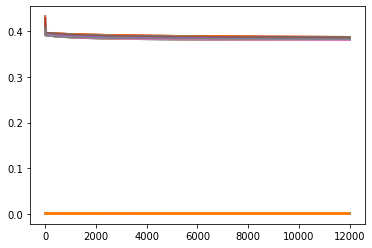

In [ ]:

# After having previously run a grid search we obtained the best value at "Accuracy for LOR_SGD at alpha =  0.1 , lambda =  0.3  and iterations =  12000  is  0.2961876832844575" so we have altered our grid search by a bit and removed number of iterations and set it fixed to 12000


batch_size = 10
n_epochs = 5000
for i in range(0,3):
  alpha = alphaoptions[i]
  for k in range(0,3):
      lamb = lamboptions[k] 
      # LOR WITH BGD
      Ypred_LOR_BGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_BGD_ModelValue = LOR_BGD(alpha,iters)
      Ypred_LOR_BGD = np.append(Ypred_LOR_BGD,Ypred_LOR_BGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_BGD_ModelValue = LOR_BGD(alpha,iters)
      Ypred_LOR_BGD = np.append(Ypred_LOR_BGD,Ypred_LOR_BGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_BGD_ModelValue = LOR_BGD(alpha,iters)
      Ypred_LOR_BGD = np.append(Ypred_LOR_BGD,Ypred_LOR_BGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_BGD_ModelValue = LOR_BGD(alpha,iters)
      Ypred_LOR_BGD = np.append(Ypred_LOR_BGD,Ypred_LOR_BGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_BGD = np.delete(Ypred_LOR_BGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_BGD = np.argmax(Ypred_LOR_BGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_BGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_BGD = np.asmatrix(Ypred_LOR_BGD)
      print("Accuracy for LOR_BGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_BGD),"\n") # we find accuracy at particular value
      
      
      # LOR WITH MBGD
      Ypred_LOR_MBGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_MBGD_ModelValue = LOR_MBGD(alpha,iters,batch_size)
      Ypred_LOR_MBGD = np.append(Ypred_LOR_MBGD,Ypred_LOR_MBGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_MBGD_ModelValue = LOR_MBGD(alpha,iters,batch_size)
      Ypred_LOR_MBGD = np.append(Ypred_LOR_MBGD,Ypred_LOR_MBGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_MBGD_ModelValue = LOR_MBGD(alpha,iters,batch_size)
      Ypred_LOR_MBGD = np.append(Ypred_LOR_MBGD,Ypred_LOR_MBGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_MBGD_ModelValue = LOR_MBGD(alpha,iters,batch_size)
      Ypred_LOR_MBGD = np.append(Ypred_LOR_MBGD,Ypred_LOR_MBGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_MBGD = np.delete(Ypred_LOR_MBGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_MBGD = np.argmax(Ypred_LOR_MBGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_MBGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_MBGD = np.asmatrix(Ypred_LOR_MBGD)
      print("Accuracy for LOR_MBGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_MBGD),"\n") # we find accuracy at particular value

      # LOR with SGD
      Ypred_LOR_SGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_SGD_ModelValue = LOR_SGD(alpha,iters)
      Ypred_LOR_SGD = np.append(Ypred_LOR_SGD,Ypred_LOR_SGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_SGD_ModelValue = LOR_SGD(alpha,iters)
      Ypred_LOR_SGD = np.append(Ypred_LOR_SGD,Ypred_LOR_SGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_SGD_ModelValue = LOR_SGD(alpha,iters)
      Ypred_LOR_SGD = np.append(Ypred_LOR_SGD,Ypred_LOR_SGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_SGD_ModelValue = LOR_SGD(alpha,iters)
      Ypred_LOR_SGD = np.append(Ypred_LOR_SGD,Ypred_LOR_SGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_SGD = np.delete(Ypred_LOR_SGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_SGD = np.argmax(Ypred_LOR_SGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_SGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_SGD = np.asmatrix(Ypred_LOR_SGD)
      print("Accuracy for LOR_SGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_SGD),"\n") # we find accuracy at particular value
      
      
      # LOR with L2 and BGD
      Ypred_LOR_L2_BGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_L2_BGD_ModelValue = LOR_L2_BGD(alpha,iters,lamb)
      Ypred_LOR_L2_BGD = np.append(Ypred_LOR_L2_BGD,Ypred_LOR_L2_BGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_L2_BGD_ModelValue = LOR_L2_BGD(alpha,iters,lamb)
      Ypred_LOR_L2_BGD = np.append(Ypred_LOR_L2_BGD,Ypred_LOR_L2_BGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_L2_BGD_ModelValue = LOR_L2_BGD(alpha,iters,lamb)
      Ypred_LOR_L2_BGD = np.append(Ypred_LOR_L2_BGD,Ypred_LOR_L2_BGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_L2_BGD_ModelValue = LOR_L2_BGD(alpha,iters,lamb)
      Ypred_LOR_L2_BGD = np.append(Ypred_LOR_L2_BGD,Ypred_LOR_L2_BGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_L2_BGD = np.delete(Ypred_LOR_L2_BGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_L2_BGD = np.argmax(Ypred_LOR_L2_BGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_L2_BGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_L2_BGD = np.asmatrix(Ypred_LOR_L2_BGD)
      print("Accuracy for LOR_L2_BGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_L2_BGD),"\n") # we find accuracy at particular value
      
      
      # LOR with L2 and MBGD
      Ypred_LOR_L2_MBGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_L2_MBGD_ModelValue = LOR_L2_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L2_MBGD = np.append(Ypred_LOR_L2_MBGD,Ypred_LOR_L2_MBGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_L2_MBGD_ModelValue = LOR_L2_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L2_MBGD = np.append(Ypred_LOR_L2_MBGD,Ypred_LOR_L2_MBGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_L2_MBGD_ModelValue = LOR_L2_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L2_MBGD = np.append(Ypred_LOR_L2_MBGD,Ypred_LOR_L2_MBGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_L2_MBGD_ModelValue = LOR_L2_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L2_MBGD = np.append(Ypred_LOR_L2_MBGD,Ypred_LOR_L2_MBGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_L2_MBGD = np.delete(Ypred_LOR_L2_MBGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_L2_MBGD = np.argmax(Ypred_LOR_L2_MBGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_L2_MBGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_L2_MBGD = np.asmatrix(Ypred_LOR_L2_MBGD)
      print("Accuracy for LOR_L2_MBGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_L2_MBGD),"\n") # we find accuracy at particular value
      
      
      # LOR with L2 and SGD
      Ypred_LOR_L2_SGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_L2_SGD_ModelValue = LOR_L2_SGD(alpha,iters,lamb)
      Ypred_LOR_L2_SGD = np.append(Ypred_LOR_L2_SGD,Ypred_LOR_L2_SGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_L2_SGD_ModelValue = LOR_L2_SGD(alpha,iters,lamb)
      Ypred_LOR_L2_SGD = np.append(Ypred_LOR_L2_SGD,Ypred_LOR_L2_SGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_L2_SGD_ModelValue = LOR_L2_SGD(alpha,iters,lamb)
      Ypred_LOR_L2_SGD = np.append(Ypred_LOR_L2_SGD,Ypred_LOR_L2_SGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_L2_SGD_ModelValue = LOR_L2_SGD(alpha,iters,lamb)
      Ypred_LOR_L2_SGD = np.append(Ypred_LOR_L2_SGD,Ypred_LOR_L2_SGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_L2_SGD = np.delete(Ypred_LOR_L2_SGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_L2_SGD = np.argmax(Ypred_LOR_L2_SGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_L2_SGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_L2_SGD = np.asmatrix(Ypred_LOR_L2_SGD)
      print("Accuracy for LOR_L2_SGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_L2_SGD),"\n") # we find accuracy at particular value

      # LOR with L1 and BGD
      Ypred_LOR_L1_BGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_L1_BGD_ModelValue = LOR_L1_BGD(alpha,iters,lamb)
      Ypred_LOR_L1_BGD = np.append(Ypred_LOR_L1_BGD,Ypred_LOR_L1_BGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_L1_BGD_ModelValue = LOR_L1_BGD(alpha,iters,lamb)
      Ypred_LOR_L1_BGD = np.append(Ypred_LOR_L1_BGD,Ypred_LOR_L1_BGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_L1_BGD_ModelValue = LOR_L1_BGD(alpha,iters,lamb)
      Ypred_LOR_L1_BGD = np.append(Ypred_LOR_L1_BGD,Ypred_LOR_L1_BGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_L1_BGD_ModelValue = LOR_L1_BGD(alpha,iters,lamb)
      Ypred_LOR_L1_BGD = np.append(Ypred_LOR_L1_BGD,Ypred_LOR_L1_BGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_L1_BGD = np.delete(Ypred_LOR_L1_BGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_L1_BGD = np.argmax(Ypred_LOR_L1_BGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_L1_BGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_L1_BGD = np.asmatrix(Ypred_LOR_L1_BGD)
      print("Accuracy for LOR_L1_BGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_L1_BGD),"\n") # we find accuracy at particular value

      # LOR with L1 and MBGD
      Ypred_LOR_L1_MBGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_L1_MBGD_ModelValue = LOR_L1_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L1_MBGD = np.append(Ypred_LOR_L1_MBGD,Ypred_LOR_L1_MBGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_L1_MBGD_ModelValue = LOR_L1_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L1_MBGD = np.append(Ypred_LOR_L1_MBGD,Ypred_LOR_L1_MBGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_L1_MBGD_ModelValue = LOR_L1_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L1_MBGD = np.append(Ypred_LOR_L1_MBGD,Ypred_LOR_L1_MBGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_L1_MBGD_ModelValue = LOR_L1_MBGD(alpha,iters,batch_size,lamb)
      Ypred_LOR_L1_MBGD = np.append(Ypred_LOR_L1_MBGD,Ypred_LOR_L1_MBGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_L1_MBGD = np.delete(Ypred_LOR_L1_MBGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_L1_MBGD = np.argmax(Ypred_LOR_L1_MBGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_L1_MBGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_L1_MBGD = np.asmatrix(Ypred_LOR_L1_MBGD)
      print("Accuracy for LOR_L1_MBGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_L1_MBGD),"\n") # we find accuracy at particular value

      # LOR with L1 and SGD
      Ypred_LOR_L1_SGD = np.ones([341,1]) #we make a dummy arrray
      Ytr = np.asmatrix(Ytrain_M1).T
      Ypred_LOR_L1_SGD_ModelValue = LOR_L1_SGD(alpha,iters,lamb)
      Ypred_LOR_L1_SGD = np.append(Ypred_LOR_L1_SGD,Ypred_LOR_L1_SGD_ModelValue,axis=1) #we append M1 values
      Ytr = np.asmatrix(Ytrain_M2).T
      Ypred_LOR_L1_SGD_ModelValue = LOR_L1_SGD(alpha,iters,lamb)
      Ypred_LOR_L1_SGD = np.append(Ypred_LOR_L1_SGD,Ypred_LOR_L1_SGD_ModelValue,axis=1) #we append M2 values
      Ytr = np.asmatrix(Ytrain_M3).T
      Ypred_LOR_L1_SGD_ModelValue = LOR_L1_SGD(alpha,iters,lamb)
      Ypred_LOR_L1_SGD = np.append(Ypred_LOR_L1_SGD,Ypred_LOR_L1_SGD_ModelValue,axis=1) #we append M3 values
      Ytr = np.asmatrix(Ytrain_M4).T
      Ypred_LOR_L1_SGD_ModelValue = LOR_L1_SGD(alpha,iters,lamb)
      Ypred_LOR_L1_SGD = np.append(Ypred_LOR_L1_SGD,Ypred_LOR_L1_SGD_ModelValue,axis=1) #we append M4 values
      Ypred_LOR_L1_SGD = np.delete(Ypred_LOR_L1_SGD, 0, 1) #we delete dummy ones column
      Ypred_LOR_L1_SGD = np.argmax(Ypred_LOR_L1_SGD, axis=1)+1 #we assign class labels based on probabilities
      #print(Ypred_LOR_L1_SGD)
      Yvalid = np.asmatrix(Yvalid)
      Ypred_LOR_L1_SGD = np.asmatrix(Ypred_LOR_L1_SGD)
      print("Accuracy for LOR_L1_SGD at alpha = ",alpha,", lambda = ",lamb," and iterations = ",iters," is ",skm.accuracy_score(Yvalid.T, Ypred_LOR_L1_SGD),"\n") # we find accuracy at particular value



Now that we have used our validation data to find our optimum parameter values, we will employ these values to our test data. Our optimum values are alpha = 0.1, lambda = 0.3 and iterations = 12000. Here we will only employ LOR with SGD case but other cases can be employed simillarly as shown above.

Now, we shall implement the One vs One Model.

In [ ]:
data_onevsone = pd.read_excel('/content/drive/MyDrive/data_Q4.xlsx',header=None)
print(data_onevsone)
print(data_onevsone.shape)

              0           1           2           3           4           5   \
0     242.751526  281.801298  250.032405  132.099709   61.166502  247.837695   
1     216.585951  297.057883  300.938478  131.358295  105.976730  273.299350   
2     265.735536  339.271134  269.817305  102.304781   83.869539  281.962656   
3     207.631953  255.284282  254.563071  229.883639   87.492384  303.314846   
4     205.016124  333.265999  536.342842  106.237587  155.700409  272.692251   
...          ...         ...         ...         ...         ...         ...   
3407  723.913528  343.529660  360.468834  233.711682  177.309124  717.744261   
3408  466.593370  215.858228  235.940729  309.475340  126.789443  333.123293   
3409  446.227198  219.936910  181.605753  160.483773  106.179660  416.263221   
3410  511.406437  215.379710  170.598957   89.543149   73.107090  457.783309   
3411  757.967516  268.431243  189.755280  156.957408  126.298293  835.417941   

              6           7           8

In [ ]:
data_onevsone_values = data_onevsone.values
print(data_onevsone_values)
data_onevsone_values = np.take(data_onevsone_values,np.random.permutation(data_onevsone_values.shape[0]),axis=0,out=data_onevsone_values)
print(data_onevsone_values)

[[242.75152634 281.80129772 250.03240457 ...   1.28197209   1.8448603
    1.        ]
 [216.58595112 297.05788313 300.9384782  ...   1.59858185   1.62539544
    1.        ]
 [265.73553593 339.27113445 269.81730525 ...   1.84815977   1.70613365
    1.        ]
 ...
 [446.22719796 219.93690991 181.60575345 ...   1.41851014   1.77229548
    4.        ]
 [511.40643675 215.37971012 170.59895734 ...   1.60929772   1.66489041
    4.        ]
 [757.96751558 268.43124317 189.75528024 ...   1.79003949   1.56063308
    4.        ]]
[[575.85427001 446.49012138 488.8665109  ...   1.66315922   1.54580234
    2.        ]
 [238.77840725 122.07767083 196.98130991 ...   1.59301201   1.62768437
    3.        ]
 [304.26438833 352.97378125 338.93499076 ...   1.79031258   1.56720704
    1.        ]
 ...
 [454.24631909 938.95513227 337.74444131 ...   1.80235446   1.81591508
    2.        ]
 [538.3450476  570.92391022 402.28356465 ...   1.57945617   1.37450674
    2.        ]
 [434.3616972  372.26806379 371.8

In [ ]:
data_onevsone_values_train = data_onevsone_values[:math.floor(0.7*m),:]
data_onevsone_values_valid = data_onevsone_values[math.floor(0.7*m):math.floor(0.8*m),:]
data_onevsone_values_test = data_onevsone_values[math.floor(0.8*m):m,:]
print(data_onevsone_values_train)
print(data_onevsone_values_train.shape)
print(data_onevsone_values_valid)
print(data_onevsone_values_valid.shape)
print(data_onevsone_values_test)
print(data_onevsone_values_test.shape)

[[575.85427001 446.49012138 488.8665109  ...   1.66315922   1.54580234
    2.        ]
 [238.77840725 122.07767083 196.98130991 ...   1.59301201   1.62768437
    3.        ]
 [304.26438833 352.97378125 338.93499076 ...   1.79031258   1.56720704
    1.        ]
 ...
 [398.93563533 657.26001985 638.48761595 ...   1.86006021   1.92531026
    3.        ]
 [498.7087812  415.99790178 334.25126978 ...   1.76900651   1.67969641
    1.        ]
 [583.36324111 576.99988919 434.06782699 ...   2.00286713   1.72342952
    3.        ]]
(2388, 61)
[[680.1112571  343.37510976 317.60227623 ...   1.72176563   1.4618229
    3.        ]
 [166.05475744 307.72349619 254.62978318 ...   1.62970861   1.25877289
    1.        ]
 [638.68413154 255.332395   399.30067042 ...   1.86896036   1.95694876
    4.        ]
 ...
 [551.89743738 558.13429394 471.44923553 ...   1.71606381   1.66406737
    4.        ]
 [637.68778122 497.87851938 602.70547796 ...   1.89971066   1.89613421
    4.        ]
 [487.3546205  404.763

As we already know, first 851 rows are class label 1, next 855 class label 2, next 855 class label 3 and alst 851 class label 4. We will now create datasets for 1vs2, 1vs3, 1vs4, 2vs3, 2vs4 and 3vs4 respectively.